In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [3]:
df=pd.read_csv('reviews_summary.csv')

In [4]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [5]:
from langdetect import detect

In [6]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [7]:
%%time
df['language'] = df['comments'].apply(language_detection)

Wall time: 35min 36s


In [8]:
df.language.value_counts().head(10)

en    271847
de     77174
fr     16887
es     12164
it      4864
nl      3881
ru      2306
ko      1633
pt      1396
da      1361
Name: language, dtype: int64

In [9]:
df_eng = df[(df['language']=='en')]

In [13]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import nltk
nltk.download('stopwords')

import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


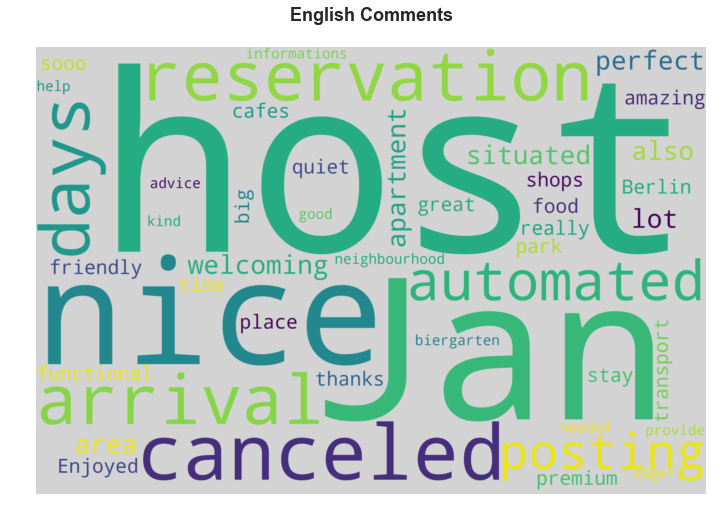

In [14]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()
    
wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightgrey", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(df_eng.comments.values))

plot_wordcloud(wordcloud, 'English')

In [36]:
df_eng.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,language
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...,en
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ...",en
6,2015,76603178,2016-05-28,29323516,Laurent,"We had a very nice stay in Berlin, thanks to J...",en
7,2015,77296201,2016-05-31,9025122,Rasmus,"Great location close to Mauerpark, Kastanienal...",en
9,2015,82322683,2016-06-27,73902920,Mag,"Apartment very well located, close to everythi...",en


In [37]:
df_eng=df_eng[['comments']]

In [49]:
df_eng.index = range(len(df_eng))

In [50]:
print(df_eng)

                                                 comments
0       Jan was very friendly and welcoming host! The ...
1       It is really nice area, food, park, transport ...
2       We had a very nice stay in Berlin, thanks to J...
3       Great location close to Mauerpark, Kastanienal...
4       Apartment very well located, close to everythi...
5        My staying at Jan's was perfect: the apartmen...
6       Apartment is walking distance to all the cafe'...
7       Charming and quiet apartment. Excellent area, ...
8       Jan made us feel welcome in the apartment and ...
9       The location is perfect, the apartment is very...
10      The flat is very nice and well equipped, in a ...
11      A fantastic quiet location & a lovely apartmen...
12      Jan's apartment was perfect for our four night...
13      Jan is great! Super welcoming and available fo...
14      Great location for exploring Berlin. Jan made ...
15      Perfect 3 night stay at Jan! We had no issues ...
16      very n

In [51]:
# load the SentimentIntensityAnalyser object in
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# assign it to another name to make it easier to use
analyzer = SentimentIntensityAnalyzer()



In [52]:
def print_sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [53]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [54]:
df_eng['sentiment_neg'] = df_eng['comments'].apply(negative_score)
df_eng['sentiment_neu'] = df_eng['comments'].apply(neutral_score)
df_eng['sentiment_pos'] = df_eng['comments'].apply(positive_score)
df_eng['sentiment_compound'] = df_eng['comments'].apply(compound_score)

In [55]:
df = df_eng

In [56]:
print(df)

                                                 comments  sentiment_neg  \
0       Jan was very friendly and welcoming host! The ...          0.000   
1       It is really nice area, food, park, transport ...          0.000   
2       We had a very nice stay in Berlin, thanks to J...          0.000   
3       Great location close to Mauerpark, Kastanienal...          0.000   
4       Apartment very well located, close to everythi...          0.000   
5        My staying at Jan's was perfect: the apartmen...          0.000   
6       Apartment is walking distance to all the cafe'...          0.000   
7       Charming and quiet apartment. Excellent area, ...          0.000   
8       Jan made us feel welcome in the apartment and ...          0.000   
9       The location is perfect, the apartment is very...          0.000   
10      The flat is very nice and well equipped, in a ...          0.000   
11      A fantastic quiet location & a lovely apartmen...          0.000   
12      Jan'

In [57]:
df.head()

,comments,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,Jan was very friendly and welcoming host! The ...,0.0,0.505,0.495,0.9703
1,"It is really nice area, food, park, transport ...",0.0,0.530,0.470,0.7955
2,"We had a very nice stay in Berlin, thanks to J...",0.0,0.657,0.343,0.9779
3,"Great location close to Mauerpark, Kastanienal...",0.0,0.727,0.273,0.8353
4,"Apartment very well located, close to everythi...",0.0,0.811,0.189,0.8439


In [58]:
percentiles = df.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    271847.000000
mean          0.831561
std           0.262010
min          -0.996800
5%            0.051600
10%           0.585900
20%           0.784500
30%           0.861900
40%           0.903100
50%           0.928700
60%           0.946800
70%           0.960800
80%           0.972100
90%           0.982500
max           0.999500
Name: sentiment_compound, dtype: float64

In [60]:
def classifier(row):
         if row["sentiment_compound"] > 0:
                return "1"
         else:
              return "0"
  
df["sentiment"] = df.apply(classifier, axis=1)
df.head()

,comments,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,sentiment
0,Jan was very friendly and welcoming host! The ...,0.0,0.505,0.495,0.9703,1
1,"It is really nice area, food, park, transport ...",0.0,0.530,0.470,0.7955,1
2,"We had a very nice stay in Berlin, thanks to J...",0.0,0.657,0.343,0.9779,1
3,"Great location close to Mauerpark, Kastanienal...",0.0,0.727,0.273,0.8353,1
4,"Apartment very well located, close to everythi...",0.0,0.811,0.189,0.8439,1


In [62]:
df_final=df.drop(['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound'], axis=1)

In [64]:
df_final.head()

,comments,sentiment
0,Jan was very friendly and welcoming host! The ...,1
1,"It is really nice area, food, park, transport ...",1
2,"We had a very nice stay in Berlin, thanks to J...",1
3,"Great location close to Mauerpark, Kastanienal...",1
4,"Apartment very well located, close to everythi...",1


In [65]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [67]:
df_final['comments'] = np.vectorize(remove_pattern)(df_final['comments'], "@[\w]*")

In [68]:
df_final['comments'] = df_final['comments'].str.replace("[^a-zA-Z#]", " ")

In [69]:
df_final['comments'] = df_final['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [70]:
tokenized_comments = df_final['comments'].apply(lambda x: x.split())
tokenized_comments.head()

0    [very, friendly, welcoming, host, apartment, g...
1    [really, nice, area, food, park, transport, pe...
2    [very, nice, stay, Berlin, thanks, premium, si...
3    [Great, location, close, Mauerpark, Kastaniena...
4    [Apartment, very, well, located, close, everyt...
Name: comments, dtype: object

In [71]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_comments = tokenized_comments.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_comments.head()

0    [veri, friendli, welcom, host, apart, great, a...
1    [realli, nice, area, food, park, transport, pe...
2    [veri, nice, stay, berlin, thank, premium, sit...
3    [great, locat, close, mauerpark, kastanienalle...
4    [apart, veri, well, locat, close, everyth, sup...
Name: comments, dtype: object

In [72]:
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])
df_final['comments'] = tokenized_comments

In [73]:
df_final.head()

,comments,sentiment
0,veri friendli welcom host apart great area soo...,1
1,realli nice area food park transport perfect,1
2,veri nice stay berlin thank premium situat apa...,1
3,great locat close mauerpark kastanienalle rose...,1
4,apart veri well locat close everyth supermarke...,1


In [86]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_final['comments'])

In [94]:
from sklearn.model_selection import train_test_split
y=df_final['sentiment']
X_train, X_test, y_train, y_test = train_test_split(bow, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lreg = LogisticRegression()
lreg.fit(X_train, y_train) # training the model

(217477, 1000) (217477,)
(54370, 1000) (54370,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
predictions = lreg.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 1966   743]
 [  134 51527]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      2709
           1       0.99      1.00      0.99     51661

    accuracy                           0.98     54370
   macro avg       0.96      0.86      0.90     54370
weighted avg       0.98      0.98      0.98     54370

0.9838697811292992
